# Simulate Success Count from Sample
Using Julia, fit a data sample to a Binomial distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. A Binomial distribution characterizes the number of successes in a sequence of independent trials. It has two parameters: n, the number of trials, and p, the probability of success in an individual trial,

## 0. Import packages and define SimulateSuccessCountFromSample function
Install (if necessary) and import the functions necessary to run the SimulateSuccessCountFromSample function. Then define the function for later use. 

In [10]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateSuccessCountFromSample(
    dataframe::DataFrame,
    column_name::String,
    sample_size_per_trial::Integer= findmax(dataframe[:, column_name])[1],
    trials::Integer= 10000,
    show_plot::Bool= true
)
    # Get parameters for simulation
    Param_BinomialDistSim = fit(Binomial, sample_size_per_trial, dataframe[:, column_name])
    println("Sample size (n) per trial used in simulation: ", Param_BinomialDistSim.n)
    println("Probability of success (p) used in simulation: ", Param_BinomialDistSim.p)
    # Conduct simulation
    Arr_BinomialDistSim = rand(Param_BinomialDistSim, trials, 1)
    DF_BinomialDistSim = DataFrame(Arr_BinomialDistSim, :auto)
    # Group and summarize by outcomes
    GDF_BinomialDistSim = groupby(DF_BinomialDistSim, "x1")
    GDF_BinomialDistSim = combine(GDF_BinomialDistSim, nrow)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_BinomialDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Successes (Binomial Distribution)"
        p = bar(
            GDF_BinomialDistSim[:, "x1"], 
            GDF_BinomialDistSim[:, "nrow"],
            fillalpha= 0.4, 
            label= "Simulated Outcomes", 
            title= title_for_plot, 
            xlabel= column_name,
            xticks= 0:1:sample_size_per_trial,
        )
        plot!(
            kde_simulation.x, 
            kde_simulation.density .* length(DF_BinomialDistSim[:, "x1"]) .* 0.5, 
            linewidth= 3, 
            color= 1, 
            label= "Density of Simulation"
        )
        plot!(
            kde_sample.x, 
            kde_sample.density .* length(DF_BinomialDistSim[:, "x1"]) .* 1,
            alpha= 0.6,
            linewidth= 3, 
            color= 2, 
            label= "Density of Sample"
        )
        display(p)
    end
    # Return simulation results
    return DF_BinomialDistSim
end

SimulateSuccessCountFromSample (generic function with 4 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [2]:
Arr_RandomNumbers = rand(0:5, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)


,x1
,Int64
1,5
2,4
3,2
4,0
5,0
6,3
7,4
8,2
9,1


## 2. Use the SimulateSuccessCountFromSample function
Use the SimulateSuccessCountFromSample function to simulate a Binomial distribution from your sample dataset.

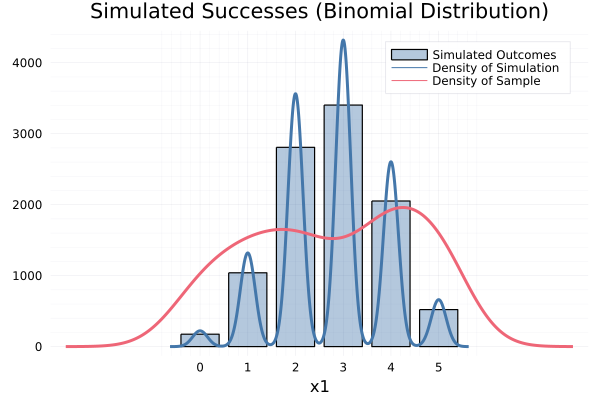

Sample size (n) per trial used in simulation: 5
Probability of success (p) used in simulation: 0.552


,x1
,Int64
1,1
2,3
3,3
4,2
5,4
6,3
7,2
8,3
9,4


In [11]:
DF_Sim = SimulateSuccessCountFromSample(DF_RandomNumbers, "x1")

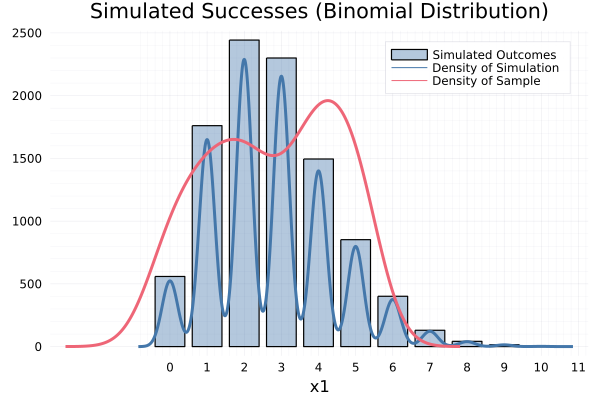

Sample size (n) per trial used in simulation: 50
Probability of success (p) used in simulation: 0.0552


,x1
,Int64
1,6
2,3
3,1
4,6
5,2
6,4
7,2
8,2
9,6


In [12]:
DF_Sim = SimulateSuccessCountFromSample(
    DF_RandomNumbers,
    "x1",
    50
)